<a href="https://colab.research.google.com/github/mb16biswas/cat_vs_dog_classifier-/blob/main/cats_vs_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


--2021-01-25 17:05:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.71.128, 74.125.133.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.71.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  70.7MB/s    in 0.9s    

2021-01-25 17:05:14 (70.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     


validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
print(train_generator)

In [5]:
IMG_SIZE = 150 
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [6]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [7]:
base_model.trainable = False

In [8]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [9]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [14]:
prediction_layer = tf.keras.layers.Dense(1 , activation='sigmoid')

In [15]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [28]:
history = model.fit(
      train_generator,
      validation_data= validation_generator , 
      steps_per_epoch=8,  
      epochs= 30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 6s 816ms/step - loss: 0.1696 - accuracy: 0.9375 - val_loss: 0.1462 - val_accuracy: 0.9470
Epoch 2/30
8/8 [==============================] - 5s 684ms/step - loss: 0.2015 - accuracy: 0.9250 - val_loss: 0.1398 - val_accuracy: 0.9520
Epoch 3/30
8/8 [==============================] - 5s 680ms/step - loss: 0.1831 - accuracy: 0.9187 - val_loss: 0.1350 - val_accuracy: 0.9510
Epoch 4/30
8/8 [==============================] - 5s 679ms/step - loss: 0.1500 - accuracy: 0.9500 - val_loss: 0.1347 - val_accuracy: 0.9520
Epoch 5/30
8/8 [==============================] - 5s 678ms/step - loss: 0.1121 - accuracy: 0.9563 - val_loss: 0.1488 - val_accuracy: 0.9470
Epoch 6/30
8/8 [==============================] - 5s 680ms/step - loss: 0.1844 - accuracy: 0.9375 - val_loss: 0.1424 - val_accuracy: 0.9510
Epoch 7/30
8/8 [==============================] - 5s 700ms/step - loss: 0.2380 - accuracy: 0.9312 - val_loss: 0.1252 - val_accuracy: 0.9500
Epoch 8/30
8/8 [====

In [29]:
acc = history.history['accuracy']
print(acc)

[0.9375, 0.925000011920929, 0.918749988079071, 0.949999988079071, 0.956250011920929, 0.9375, 0.9312499761581421, 0.9437500238418579, 0.893750011920929, 0.925000011920929, 0.918749988079071, 0.8999999761581421, 0.90625, 0.893750011920929, 0.9437500238418579, 0.9624999761581421, 0.918749988079071, 0.8812500238418579, 0.9624999761581421, 0.9375, 0.90625, 0.918749988079071, 0.925000011920929, 0.893750011920929, 0.9312499761581421, 0.9437500238418579, 0.90625, 0.9312499761581421, 0.90625, 0.9312499761581421]


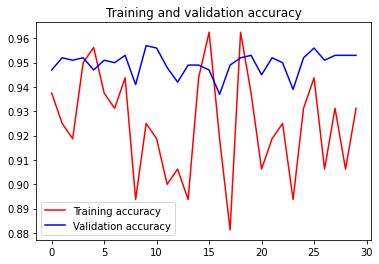

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [31]:
model.save("dogs_vs_cats")  # you can use the train model later 
new_model = tf.keras.models.load_model('dogs_vs_cats')

INFO:tensorflow:Assets written to: dogs_vs_cats/assets


In [36]:

#prediction for costume images
 

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat ")

Saving kutta.jpg to kutta.jpg
[0.64164835]
kutta.jpg is a dog
